<a href="https://colab.research.google.com/github/darknight11345/turtlebot4/blob/main/Text_180125_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd


'/content'

In [1]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00
  

In [2]:
!pip install fsspec==2024.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.2.0 requires fsspec[http]<=2024.9.0,>=2023.1.0, but you have fsspec 2024.10.0 which is incompatible.


In [3]:
import pandas as pd
data = pd.read_csv("ner_dataset_with_head_towards_and_noise.csv",encoding="latin1", delimiter=";" )

In [4]:
print("Columns in the CSV:", data.columns)

Columns in the CSV: Index(['Sentence_ID', 'Word', 'Label'], dtype='object')


In [5]:
data.head(30)

,Sentence_ID,Word,Label
0,1,Navigate,ACTION
1,1,to,O
2,1,Room 282,LOCATION
3,1,with,O
4,1,Aspirin.,O
5,2,Take,ACTION
6,2,Ibuprofen,MEDICINE
7,2,to,O
8,2,Room 143.,LOCATION
9,3,Navigate,ACTION


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
data.rename(columns={"Sentence_ID":"sentence_id","Word":"words","Label":"labels"}, inplace =True)

In [8]:
data["labels"] = data["labels"].str.upper()

In [ ]:
#X= data[["sentence_id","words"]]
#Y =data["labels"]

In [9]:
# Group by Sentence_ID
grouped_data = data.groupby("sentence_id")

# Prepare sentences and labels
sentences = grouped_data["words"].apply(list).tolist()
labels = grouped_data["labels"].apply(list).tolist()

# Check grouped sentences and labels
print(sentences)
print(labels)


[['Navigate', 'to', 'Room 282', 'with', 'Aspirin.'], ['Take', 'Ibuprofen', 'to', 'Room 143.'], ['Navigate', 'to', 'doctors room', 'with', 'Tylenol.'], ['Proceed', 'to', 'nurse station', 'with', 'Penicillin.'], ['Navigate', 'to', 'doctors room', 'with', 'Cough', 'Syrup.'], ['Bring', 'Ibuprofen', 'to', 'Room 339.'], ['Deliver', 'Penicillin', 'to', 'Room 164.'], ['Head towards', 'to', 'Room 357', 'with', 'Aspirin.'], ['head', 'Take', 'towards', 'Penicillin', 'to', 'Room 351.'], ['Go', 'to', 'Room 174', 'with', 'Penicillin.'], ['Take', 'Ibuprofen', 'to', 'ICU.'], ['Go', 'to', 'nurse station', 'with', 'Antibiotics.'], ['Move', 'to', 'nurse station', 'with', 'Aspirin.'], ['Proceed', 'to', 'ICU', 'with', 'Paracetamol.'], ['Deliver', 'Tylenol', 'to', 'doctors_room.'], ['room.', 'to', 'doctors', 'Antibiotics', 'Bring'], ['Go', 'to', 'doctors room', 'with', 'Ibuprofen.'], ['head', 'Go', 'to', 'ICU', 'towards', 'with', 'Aspirin.'], ['Deliver', 'Aspirin', 'to', 'Room 135.'], ['Bring', 'Penicillin'

In [10]:
grouped_data.head()

,sentence_id,words,labels
0,1,Navigate,ACTION
1,1,to,O
2,1,Room 282,LOCATION
3,1,with,O
4,1,Aspirin.,O
...,...,...,...
9532,1999,Deliver,ACTION
9533,2000,Transport,ACTION
9534,2000,Paracetamol,MEDICINE
9535,2000,to,O


In [26]:
from sklearn.model_selection import train_test_split
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from simpletransformers.ner import NERModel, NERArgs

# Split sentences and labels into train and test sets based on sentences
sentences_train, sentences_test, labels_train, labels_test = train_test_split(
    sentences, labels, test_size=0.2, random_state=42
)

# Check the number of sentences in train and test sets
print(len(sentences_train), len(sentences_test))


1600 400


In [29]:
# Apply MultiLabelBinarizer to the labels
mlb = MultiLabelBinarizer()
labels_train_bin = mlb.fit_transform(labels_train)
labels_test_bin = mlb.transform(labels_test)
labels_train_bin



array([[1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       ...,
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1]])

In [30]:
# Flatten the sentences and labels for the DataFrame
flattened_sentences = [word for sentence in sentences_train for word in sentence]
flattened_labels = [label for label_set in labels_train for label in label_set]

# Create the train_data DataFrame
train_data = pd.DataFrame({
    'sentence_id': [i for i, sentence in enumerate(sentences_train) for _ in sentence],
    'words': flattened_sentences,
    'labels': flattened_labels
})

# Flatten test data similarly
flattened_sentences_test = [word for sentence in sentences_test for word in sentence]
flattened_labels_test = [label for label_set in labels_test for label in label_set]

# Create the test_data DataFrame
test_data = pd.DataFrame({
    'sentence_id': [i for i, sentence in enumerate(sentences_test) for _ in sentence],
    'words': flattened_sentences_test,
    'labels': flattened_labels_test
})

In [39]:
train_data.head(10)

,sentence_id,words,labels
0,0,Go,ACTION
1,0,to,O
2,0,emergency room,LOCATION
3,0,with,O
4,0,Cough,O
5,0,Syrup.,O
6,1,Navigate,ACTION
7,1,to,O
8,1,Room 256,LOCATION
9,1,with,O


<ipython-input-31-0ab53b535583>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


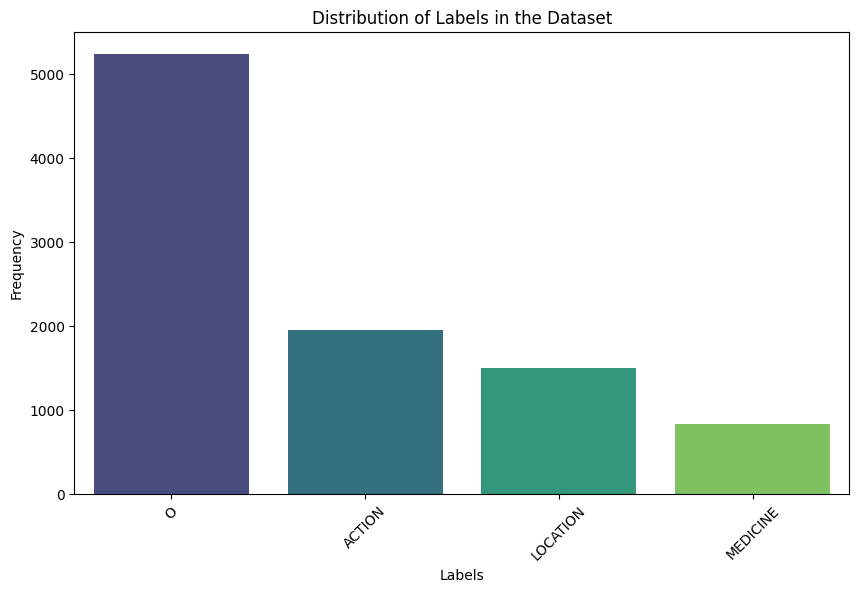

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is in the form of a DataFrame named 'data'
# For example, 'data' has 'Label' column with different labels like 'ACTION', 'O', 'LOCATION'

# Count the frequency of each label
label_counts = data['labels'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [15]:
#building up train data and test data
#train_data = pd.DataFrame({"sentence_id":x_train["sentence_id"],"words":x_train["words"],"labels":y_train})
#test_data = pd.DataFrame({"sentence_id":x_test["sentence_id"],"words":x_test["words"],"labels":y_test})

In [32]:

!pip install torch  --index-url https://download.pytorch.org/whl/cu124


Looking in indexes: https://download.pytorch.org/whl/cu124


In [33]:
from simpletransformers.ner import NERModel,NERArgs

In [34]:
label = data["labels"].unique().tolist()
label

['ACTION', 'O', 'LOCATION', 'MEDICINE']

In [42]:
print(f"Number of sentences: {len(sentences_train)}")
print(f"Number of labels per sentence: {len(labels_train)}")
print(f"Number of unique labels: {len(set(flattened_labels))}")
print(f"Shape of binary labels: {labels_train_bin.shape}")  # If you're using MultiLabelBinarizer
len(labels_train_bin)

Number of sentences: 1600
Number of labels per sentence: 1600
Number of unique labels: 4
Shape of binary labels: (1600, 4)


1600

In [44]:
args = NERArgs()
args.num_train_epochs = 2
args.learning_rate = 1e-4
args.overwrite_output_dir = True
args.train_batch_size = 32
args.eval_batch_size = 32
args.gradient_accumulation_steps = 4
args.max_seq_length = 128
args.fp16 = True  # Enable mixed precision
#args.n_gpu = 2  # Set based on the number of GPUs
args.local_rank = -1
args.gradient_checkpointing = True  # Reduce memory usage
args.scheduler = "linear_schedule_with_warmup"
args.warmup_steps = 500  # Adjust based on your total steps
args.use_early_stopping = True
args.early_stopping_patience = 3
args.evaluate_during_training = True
args.evaluate_during_training_steps = 1000
args.dataloader_num_workers = 2 # Adjust based on your CPU resources


In [43]:
sample_train_data = train_data.head(50)  # Take first 50 words for a test
sample_test_data = test_data.head(50)

In [46]:
labels_list = mlb.classes_.tolist()

In [47]:
labels_list

['ACTION', 'LOCATION', 'MEDICINE', 'O']

In [ ]:
#test with small dataset
# Convert mlb.classes_ to a list
labels_list = mlb.classes_.tolist()

# Pass the list of labels to the model
model = NERModel('bert', 'bert-base-uncased', labels=labels_list, args=args, use_cuda=False)

output_dir = "./best_model_test"
model.train_model(sample_train_data, eval_data=sample_test_data, acc=accuracy_score, save_best_model=True, output_dir=output_dir)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1 [00:01<?, ?it/s]

In [23]:
model = NERModel('bert', 'bert-base-uncased', labels=mlb.classes_, args=args, use_cuda=False)
output_dir = "./best_model"
model.train_model(train_data, eval_data=test_data, acc=accuracy_score, save_best_model=True, output_dir=output_dir)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [24]:
#train_data.shape
test_data.shape

(1907, 3)

In [ ]:
#
''' Train the model
output_dir = "./best_model"
train_results, model_outputs, eval_results = model.train_model(train_data, eval_data=test_data, acc=accuracy_score, save_best_model=True, output_dir=output_dir)



# Print the raw eval_results to check its structure
print("Raw eval_results:", eval_results)

# Convert eval_results to a DataFrame for easier handling
eval_df = pd.DataFrame(eval_results)

# Print the DataFrame to inspect its structure
print("eval_df:", eval_df)

# Identify the epoch with the lowest validation loss (or the highest accuracy)
if 'eval_loss' in eval_df.columns:
    best_epoch_loss = eval_df['eval_loss'].idxmin()
    print(f"The best epoch based on eval_loss is: {best_epoch_loss} with eval_loss: {eval_df['eval_loss'][best_epoch_loss]}")
else:
    print("eval_loss column not found in eval_results")

# Identify the epoch with the highest validation accuracy (if available)
if 'eval_accuracy' in eval_df.columns:
    best_epoch_accuracy = eval_df['eval_accuracy'].idxmax()
    print(f"The best epoch based on eval_accuracy is: {best_epoch_accuracy} with eval_accuracy: {eval_df['eval_accuracy'][best_epoch_accuracy]}")
else:
    print("eval_accuracy column not found in eval_results")
'''

  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import torch

# Save the model's state_dict (weights only)
torch.save(model.model.state_dict(), "model_weights.pth")

In [ ]:
result, model_outputs, preds_list = model.eval_model(test_data)

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/41 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LOCATION seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: MEDICINE seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ACTION seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


In [ ]:
result

{'eval_loss': 0.4864750762538212,
 'precision': 0.6097308488612836,
 'recall': 0.6746849942726232,
 'f1_score': 0.6405655247417075}

In [ ]:
prediction, model_output = model.predict(["deliver tablets to room 102"])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prediction

[[{'deliver': 'O'},
  {'tablets': 'O'},
  {'to': 'O'},
  {'102': 'O'},
  {'room': 'O'}]]

In [ ]:
import torch

training_args = torch.load("./outputs/training_args.bin")

# Print or inspect the contents
print(training_args)


NERArgs(adafactor_beta1=None, adafactor_clip_threshold=1.0, adafactor_decay_rate=-0.8, adafactor_eps=(1e-30, 0.001), adafactor_relative_step=True, adafactor_scale_parameter=True, adafactor_warmup_init=True, adam_betas=(0.9, 0.999), adam_epsilon=1e-08, best_model_dir='outputs/best_model', cache_dir='cache_dir/', config={}, cosine_schedule_num_cycles=0.5, custom_layer_parameters=[], custom_parameter_groups=[], dataloader_num_workers=0, do_lower_case=False, dynamic_quantize=False, early_stopping_consider_epochs=False, early_stopping_delta=0, early_stopping_metric='eval_loss', early_stopping_metric_minimize=True, early_stopping_patience=3, encoding=None, eval_batch_size=32, evaluate_during_training=False, evaluate_during_training_silent=True, evaluate_during_training_steps=2000, evaluate_during_training_verbose=False, evaluate_each_epoch=True, fp16=False, gradient_accumulation_steps=4, learning_rate=0.0001, local_rank=-1, logging_steps=50, loss_type=None, loss_args={}, manual_seed=None, ma

<ipython-input-34-91d6a9a137b6>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_args = torch.load("./outputs/training_args.bin")
